In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
from vega_datasets import data
df = data.sf_temps()

#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.shape

(8759, 2)

In [7]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [8]:
df['day'] = df.date.dt.day

In [9]:
df

,temp,date,day
0,47.8,2010-01-01 00:00:00,1
1,47.4,2010-01-01 01:00:00,1
2,46.9,2010-01-01 02:00:00,1
3,46.5,2010-01-01 03:00:00,1
4,46.0,2010-01-01 04:00:00,1
...,...,...,...
8754,50.4,2010-12-31 19:00:00,31
8755,49.9,2010-12-31 20:00:00,31
8756,49.4,2010-12-31 21:00:00,31
8757,48.8,2010-12-31 22:00:00,31


In [10]:
df = df.set_index('date').sort_index()

In [11]:
df.head()

,temp,day
date,,
2010-01-01 00:00:00,47.8,1
2010-01-01 01:00:00,47.4,1
2010-01-01 02:00:00,46.9,1
2010-01-01 03:00:00,46.5,1
2010-01-01 04:00:00,46.0,1


In [12]:
temp_data= df.temp.resample('D').mean()

In [13]:
df

,temp,day
date,,
2010-01-01 00:00:00,47.8,1
2010-01-01 01:00:00,47.4,1
2010-01-01 02:00:00,46.9,1
2010-01-01 03:00:00,46.5,1
2010-01-01 04:00:00,46.0,1
...,...,...
2010-12-31 19:00:00,50.4,31
2010-12-31 20:00:00,49.9,31
2010-12-31 21:00:00,49.4,31


In [14]:
df['daily_avg'] = df.resample('D').mean().temp

In [15]:
df.head()

,temp,day,daily_avg
date,,,
2010-01-01 00:00:00,47.8,1,49.170833
2010-01-01 01:00:00,47.4,1,NaN
2010-01-01 02:00:00,46.9,1,NaN
2010-01-01 03:00:00,46.5,1,NaN
2010-01-01 04:00:00,46.0,1,NaN


<AxesSubplot:xlabel='date'>

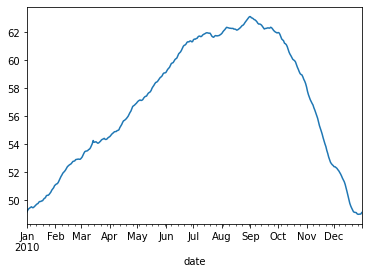

In [16]:
df.resample('D').mean().temp.plot()

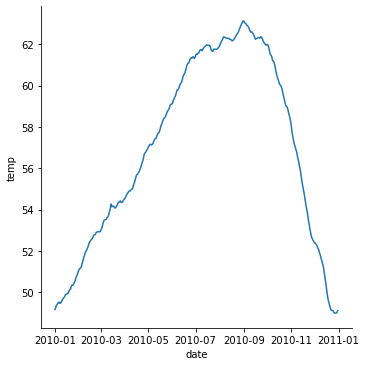

In [17]:
sns.relplot(data = temp_data, kind = 'line')

#### 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

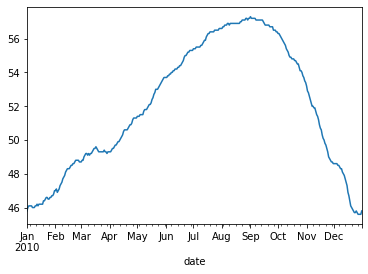

In [18]:
df.resample('d').min().temp.plot()

#### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

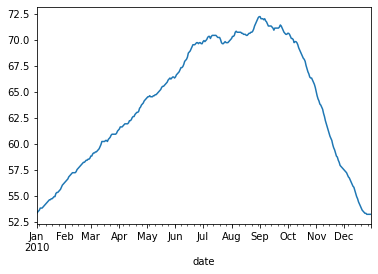

In [19]:
df.resample('d').max().temp.plot()

#### 4. Which month is the coldest, on average?

In [20]:
df['monthly_avg'] = df.temp.resample('m').mean()

In [21]:
# the coldest month was january
coldest_month = df[(df.monthly_avg) == (df.monthly_avg.min())]
coldest_month

,temp,day,daily_avg,monthly_avg
date,,,,
2010-01-31,49.4,31,51.0375,49.98414


#### 5. Which month has the highest average temperature?

In [22]:
# september was the hotest month
hottest_month = df[(df.monthly_avg) == (df.monthly_avg.max())]
hottest_month

,temp,day,daily_avg,monthly_avg
date,,,,
2010-09-30,58.1,30,61.9625,62.487083


In [23]:
df.resample('D').mean().resample('M').mean().sort_values('temp').index[0]

Timestamp('2010-01-31 00:00:00')

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [24]:
df['min_daily'] = df.resample('D').temp.min()

In [25]:
df['max_daily'] = df.resample('D').temp.max()

In [26]:
df.head()

,temp,day,daily_avg,monthly_avg,min_daily,max_daily
date,,,,,,
2010-01-01 00:00:00,47.8,1,49.170833,NaN,45.8,53.3
2010-01-01 01:00:00,47.4,1,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,46.9,1,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,46.5,1,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,46.0,1,NaN,NaN,NaN,NaN


In [27]:
df['variability'] = df.max_daily - df.min_daily

In [28]:
max_var = df[(df.variability) == (df.variability.max())]
max_var

,temp,day,daily_avg,monthly_avg,min_daily,max_daily,variability
date,,,,,,,
2010-08-31,58.8,31,63.129167,62.405376,57.2,72.2,15.0


#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines

<AxesSubplot:xlabel='date'>

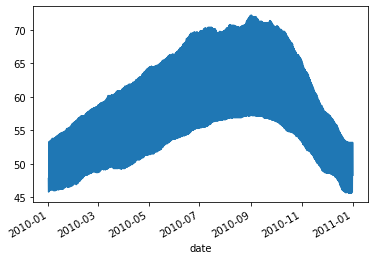

In [29]:
df.temp.plot()

**Use the dataset to answer the following questions:**

In [30]:
from vega_datasets import data
df = data.seattle_weather()

#### 1. Which year and month combination has the highest amount of precipitation?

In [31]:
df.shape

(1461, 6)

In [32]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [33]:
df.date = pd.to_datetime(df.date)

In [34]:
df = df.set_index('date').sort_index()

In [35]:
df['monthly_precipitation'] = df.precipitation.resample('M').mean()

In [36]:
df.monthly_precipitation.idxmax()

Timestamp('2015-12-31 00:00:00')

#### 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

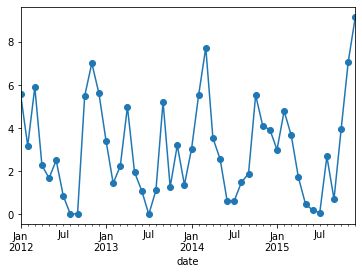

In [37]:
df.precipitation.resample('M').mean().plot(marker='o')

#### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

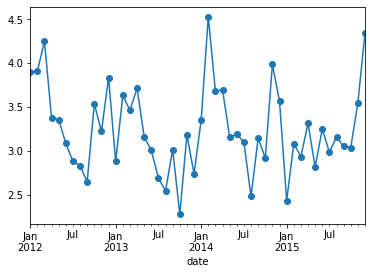

In [38]:
df.wind.resample('1M').mean().plot(marker='o')

#### 4. Which year-month combination is the windiest?

In [39]:
df['monthly_wind'] = df.wind.resample('M').mean()

In [40]:
df['yearly_wind'] = df.wind.resample('Y').mean()

In [41]:
df.yearly_wind.idxmax()

Timestamp('2012-12-31 00:00:00')

In [42]:
df['2012-01-01':'2012-12-30'].monthly_wind.idxmax()

Timestamp('2012-03-31 00:00:00')

In [43]:
#Timestamp('2012-03-31 00:00:00')

#### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [44]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,monthly_precipitation,monthly_wind,yearly_wind
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,NaN,NaN,NaN
2012-01-02,10.9,10.6,2.8,4.5,rain,NaN,NaN,NaN
2012-01-03,0.8,11.7,7.2,2.3,rain,NaN,NaN,NaN
2012-01-04,20.3,12.2,5.6,4.7,rain,NaN,NaN,NaN
2012-01-05,1.3,8.9,2.8,6.1,rain,NaN,NaN,NaN


In [45]:
sunny_df = df[df.weather == 'sun']

In [46]:
d = {'sun': True,}
sunny_df.weather.map(d).resample('Y').sum()

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

In [47]:
#2014 had the most sunny days.

#### 6. In which month does it rain the most?

In [48]:
rainy_df = df[df.weather == 'rain']
d = {'rain': True,}
rainy_df.weather.map(d).resample('M').sum()

date
2012-01-31    18
2012-02-29    17
2012-03-31    19
2012-04-30    19
2012-05-31    16
2012-06-30    19
2012-07-31    12
2012-08-31     2
2012-09-30     4
2012-10-31    17
2012-11-30    25
2012-12-31    23
2013-01-31    16
2013-02-28    23
2013-03-31    18
2013-04-30     0
2013-05-31     0
2013-06-30     0
2013-07-31     1
2013-08-31     1
2013-09-30     0
2013-10-31     1
2013-11-30     0
2013-12-31     0
2014-01-31     0
2014-02-28     0
2014-03-31     0
2014-04-30     0
2014-05-31     0
2014-06-30     0
2014-07-31     1
2014-08-31     1
2014-09-30     0
2014-10-31     1
2014-11-30     0
2014-12-31     0
2015-01-31     1
2015-02-28     0
2015-03-31     0
2015-04-30     1
2015-05-31     0
2015-06-30     0
2015-07-31     0
2015-08-31     2
2015-09-30     0
2015-10-31     1
Freq: M, Name: weather, dtype: int64

In [49]:
# 2012-11-30

#### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [50]:
rain_check_df = df[df.precipitation > 0]

In [51]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [52]:
d = {'rain': True, 'drizzle': True, 'sun': True, 'fog': True, 'snow': True}
rain_check_df.weather.map(d).resample('M').sum()

date
2012-01-31    22
2012-02-29    19
2012-03-31    22
2012-04-30    17
2012-05-31    10
2012-06-30    14
2012-07-31     7
2012-08-31     0
2012-09-30     3
2012-10-31    16
2012-11-30    20
2012-12-31    27
2013-01-31    17
2013-02-28    18
2013-03-31    15
2013-04-30    16
2013-05-31    12
2013-06-30    10
2013-07-31     0
2013-08-31     9
2013-09-30    14
2013-10-31    12
2013-11-30    15
2013-12-31    14
2014-01-31    13
2014-02-28    19
2014-03-31    20
2014-04-30    13
2014-05-31     8
2014-06-30     9
2014-07-31     2
2014-08-31     7
2014-09-30     9
2014-10-31    19
2014-11-30    16
2014-12-31    15
2015-01-31    14
2015-02-28    17
2015-03-31    16
2015-04-30    13
2015-05-31     4
2015-06-30     4
2015-07-31     2
2015-08-31     6
2015-09-30     9
2015-10-31    14
2015-11-30    20
2015-12-31    25
Freq: M, Name: weather, dtype: int64

In [53]:
#2012-12-31

In [54]:
# just checking my work
df['2012-12-01':'2012-12-31']

,precipitation,temp_max,temp_min,wind,weather,monthly_precipitation,monthly_wind,yearly_wind
date,,,,,,,,
2012-12-01,4.1,13.3,8.3,5.5,rain,NaN,NaN,NaN
2012-12-02,19.6,8.3,7.2,6.2,rain,NaN,NaN,NaN
2012-12-03,13.0,9.4,7.2,4.4,rain,NaN,NaN,NaN
2012-12-04,14.2,11.7,7.2,6.2,rain,NaN,NaN,NaN
2012-12-05,1.5,8.9,4.4,5.0,rain,NaN,NaN,NaN
2012-12-06,1.5,7.2,6.1,5.1,rain,NaN,NaN,NaN
2012-12-07,1.0,7.8,3.3,4.6,rain,NaN,NaN,NaN
2012-12-08,0.0,6.7,3.3,2.0,sun,NaN,NaN,NaN
2012-12-09,1.5,6.7,2.8,2.1,rain,NaN,NaN,NaN


### Flights

In [55]:
df = data.flights_20k()

In [56]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [57]:
#df.date = pd.to_datetime(df.date)

In [58]:
#df = df.set_index('date').sort_index()

#### 1. Convert any negative delays to 0.

In [59]:
df['delay'] = df.delay.where(df.delay > 0, 0)

In [60]:
df.delay.value_counts()

0      10516
5        776
3        577
2        507
10       476
       ...  
171        1
258        1
333        1
509        1
138        1
Name: delay, Length: 194, dtype: int64

#### 2. Which hour of the day has the highest average delay?

In [61]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


In [62]:
df['hour'] = df.date.dt.hour

In [63]:
df.groupby('hour').delay.mean()

hour
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

In [64]:
# HOUR 3 seems to have the highest amount of delays

#### 3. Does the day of the week make a difference in the delay amount?

In [65]:
df['day'] = df.date.dt.day

In [66]:
df['weekday'] = df.date.dt.weekday

In [67]:
df.head()

,date,delay,distance,origin,destination,hour,day,weekday
0,2001-01-13 14:56:00,32,417,SAN,SJC,14,13,5
1,2001-01-31 16:40:00,0,1093,FLL,ISP,16,31,2
2,2001-02-11 18:39:00,3,293,LBB,DAL,18,11,6
3,2001-01-10 21:00:00,0,550,MSY,MCO,21,10,2
4,2001-03-30 21:45:00,0,229,STL,IND,21,30,4


In [68]:
df.groupby('weekday').delay.mean()

weekday
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

In [69]:
# friday is = 4 so friday has the highest amount of delays.

#### 4. Does the month make a difference in the delay amount?

In [70]:
df['month'] = df.date.dt.month

In [71]:
df.head(30)

,date,delay,distance,origin,destination,hour,day,weekday,month
0,2001-01-13 14:56:00,32,417,SAN,SJC,14,13,5,1
1,2001-01-31 16:40:00,0,1093,FLL,ISP,16,31,2,1
2,2001-02-11 18:39:00,3,293,LBB,DAL,18,11,6,2
3,2001-01-10 21:00:00,0,550,MSY,MCO,21,10,2,1
4,2001-03-30 21:45:00,0,229,STL,IND,21,30,4,3
5,2001-03-14 14:55:00,3,405,MCI,MDW,14,14,2,3
6,2001-03-14 19:04:00,20,1999,BWI,PHX,19,14,2,3
7,2001-01-22 09:05:00,0,628,ABQ,SAN,9,22,0,1
8,2001-01-30 19:15:00,22,358,SMF,BUR,19,30,1,1
9,2001-01-27 07:00:00,0,588,BNA,BWI,7,27,5,1


In [72]:
df.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

In [73]:
# the second month has the highest mean delay.

### Bonus

In [74]:
from vega_datasets import data
df = data.iowa_electricity()

In [75]:
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
